In [34]:
# Standard library for system-specific parameters and functions
import sys

# Standard library for interacting with the operating system
import os
from os import listdir

# Libraries for numerical operations
import numpy as np

# Libraries for creating visualizations
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Library for data manipulation and analysis
import pandas as pd

# Library for image processing
from PIL import Image

# Standard library for generating random numbers
import random

# Set the seed for the random number generator for reproducibility
random.seed(100)
np.random.seed(100)

# Library for displaying images
import matplotlib.image as mpimg

# Library for machine learning and deep learning tasks
import tensorflow as tf

# Library for computer vision tasks
import cv2

# Library for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Metrics for model evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
# Keras utilities for one-hot encoding
from tensorflow.keras.utils import to_categorical

# Keras libraries for building sequential models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Optimizer library from Keras
from tensorflow.keras.optimizers import Adam

# Library for augmenting image data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time
from concurrent.futures import ThreadPoolExecutor
# Utility function from Keras for plotting model architecture
from tensorflow.keras.utils import plot_model

# Import the VGG16 model from TensorFlow's Keras applications module.
# A deep convolutional neural network architecture called VGG16 is well-known for its results on the ImageNet visual identification task.
from tensorflow.keras.applications import VGG16

import matplotlib.image as mpimg  # Importing the image module from matplotlib

# Pre-trained models from Keras
from tensorflow.keras.applications import VGG16

# Keras layers for various purposes
from tensorflow.keras.layers import GlobalAveragePooling2D, Input

# Callbacks for early stopping and model checkpoint during training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Library for using pre-trained models from TensorFlow Hub
import tensorflow_hub as hub

# Library for visualizing neural network architectures
import visualkeras

# Library to suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Set random seed for reproducibility in TensorFlow
tf.random.set_seed(100)

In [4]:
# Import the drive module from the google.colab package.
# This module is specifically designed for Google Colab notebooks to interact with Google Drive.
from google.colab import drive

# '/content/drive' is the common mount point, providing a path to access the drive contents.
drive.mount('/content/drive')

# Once mounted, you can access your Google Drive files under '/content/drive/My Drive/'.

Mounted at /content/drive


In [5]:
# Set the root directory for the breast histopathology images
root_directory = '/content/drive/MyDrive/breast_Histopathology '

# Initialize an empty list to store image file paths
image_files = []

# Retrieve all subdirectories within the root directory
subdirs = [entry.path for entry in os.scandir(root_directory) if entry.is_dir()]

# Traverse each subdirectory to find and collect image file paths
for subdir in subdirs:
    for dirpath, dirnames, filenames in os.walk(subdir):
        for filename in filenames:
            if filename.endswith(".png"):
                full_path = os.path.join(dirpath, filename)
                image_files.append(full_path)

# Print the paths of the first few images
for img_path in image_files[:3]:
    print(img_path)

/content/drive/MyDrive/breast_Histopathology /8950/1/8950_idx5_x1401_y1501_class1.png
/content/drive/MyDrive/breast_Histopathology /8950/1/8950_idx5_x1551_y1501_class1.png
/content/drive/MyDrive/breast_Histopathology /8950/1/8950_idx5_x1751_y1351_class1.png


In [6]:
# Create lists to store non-cancerous and cancerous images
non_cancerous_images = []
cancerous_images = []

# Categorize images based on the second-to-last character in the file name
for image in image_files:
    if image[-5] == '0':
        non_cancerous_images.append(image)
    elif image[-5] == '1':
        cancerous_images.append(image)

# Calculate the number of images in each category
num_non_cancerous = len(non_cancerous_images)
num_cancerous = len(cancerous_images)
total_images = num_non_cancerous + num_cancerous

# Print the counts
print('Number of non-cancerous images: {}'.format(num_non_cancerous))
print('Number of cancerous images: {}'.format(num_cancerous))
print('Total number of images: {}'.format(total_images))

Number of non-cancerous images: 246187
Number of cancerous images: 102143
Total number of images: 348330


In [7]:
# Sample random images from the lists
max_samples = 10000  # Limit the number of samples for efficiency
sampled_non_cancerous_images = random.sample(non_cancerous_images, min(len(non_cancerous_images), max_samples))  # Non-cancerous image paths
sampled_cancerous_images = random.sample(cancerous_images, min(len(cancerous_images), max_samples))  # Cancerous image paths

non_cancerous_images_array = []
cancerous_images_array = []

# Process and resize images from both categories, converting color images to 50x50 pixels.
# Create a list containing each image along with its label (0 for non-cancerous, 1 for cancerous).
for img_path in sampled_non_cancerous_images:  # Begin processing non-cancerous images
    non_cancer_img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Read the image file using OpenCV
    resized_non_cancer_img = cv2.resize(non_cancer_img, (50, 50), interpolation=cv2.INTER_LINEAR)  # Resize the image to 50x50 pixels
    non_cancerous_images_array.append([resized_non_cancer_img, 0])  # Append the resized image and label (0) to the list

for img_path in sampled_cancerous_images:  # Begin processing cancerous images
    cancer_img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    resized_cancer_img = cv2.resize(cancer_img, (50, 50), interpolation=cv2.INTER_LINEAR)
    cancerous_images_array.append([resized_cancer_img, 1])
# Combine the lists
all_images_array = non_cancerous_images_array + cancerous_images_array
random.shuffle(all_images_array)  # Shuffle the combined list to ensure better training data distribution.

In [9]:
# Initialize lists to hold features and labels
features = []
labels = []

# Loop through the image data array to separate features and labels
for feature, label in all_images_array:
    features.append(feature)
    labels.append(label)

# Convert lists to NumPy arrays for better handling in machine learning models
features = np.array(features)
labels = np.array(labels)

# Split the data into training and testing sets with 20% of the data reserved for testing
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=42)

# Define a downsampling rate to reduce the size of the training data
downsampling_rate = 0.5
sample_size = int(features.shape[0] * downsampling_rate)

# Convert labels into one-hot encoded format for neural network compatibility
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

# Print the dimensions of the train and test datasets to verify their sizes
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))


X_train shape: (16000, 50, 50, 3)
X_test shape: (4000, 50, 50, 3)
y_train shape: (16000, 2)
y_test shape: (4000, 2)


In [27]:
#Calculate and display the percentage of training and test data
total_samples = X_train.shape[0] + X_test.shape[0]
train_percentage = (X_train.shape[0] / total_samples) * 100
test_percentage = (X_test.shape[0] / total_samples) * 100

print(f'Training data percentage: {train_percentage:.2f}%')
print(f'Test data percentage: {test_percentage:.2f}%')

Training data percentage: 80.00%
Test data percentage: 20.00%


In [13]:
# Define an image data generator for data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [15]:
def build_cnn_model(input_shape):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))  # Increased neuron count in the dense layer
    model.add(Dropout(0.2))  # Dropout rate adjustment
    model.add(Dense(2, activation='softmax'))

    # Compile the model using the Adam optimizer
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    return model, early_stopping_callback

cnn_model, early_stopping_callback = build_cnn_model(input_shape=(50, 50, 3))

# Train the CNN model
cnn_model_history = cnn_model.fit(datagen.flow(X_train, y_train, batch_size=75), epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# Evaluate the model on the test set and print final accuracy and loss
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f'Final Validation Loss: {test_loss:.4f}')
print(f'Final Validation Accuracy: {test_accuracy:.4f}')

Epoch 1/50
214/214 [==============================] - 16s 72ms/step - loss: 2.5846 - accuracy: 0.6965 - val_loss: 0.5299 - val_accuracy: 0.7580
Epoch 2/50
214/214 [==============================] - 16s 73ms/step - loss: 0.5199 - accuracy: 0.7582 - val_loss: 0.4761 - val_accuracy: 0.7928
Epoch 3/50
214/214 [==============================] - 16s 74ms/step - loss: 0.5070 - accuracy: 0.7721 - val_loss: 0.5275 - val_accuracy: 0.7600
Epoch 4/50
214/214 [==============================] - 15s 72ms/step - loss: 0.4939 - accuracy: 0.7778 - val_loss: 0.4794 - val_accuracy: 0.7832
Epoch 5/50
214/214 [==============================] - 15s 71ms/step - loss: 0.4902 - accuracy: 0.7811 - val_loss: 0.4558 - val_accuracy: 0.7993
Epoch 6/50
214/214 [==============================] - 15s 70ms/step - loss: 0.4933 - accuracy: 0.7754 - val_loss: 0.4642 - val_accuracy: 0.8065
Epoch 7/50
214/214 [==============================] - 16s 73ms/step - loss: 0.4796 - accuracy: 0.7849 - val_loss: 0.4552 - val_accuracy:

In [20]:
# Save the model
cnn_model.save('CNN_model_breast_histopathology.h5')
print("The CNN model has been saved to your  disk.")
# Load the model and make predictions
cnn_model_loaded = tf.keras.models.load_model('CNN_model_breast_histopathology.h5')
cnn_model_predictions = loaded_cnn_model.predict(X_test)


The CNN model has been saved to your  disk.
125/125 [==============================] - 1s 6ms/step


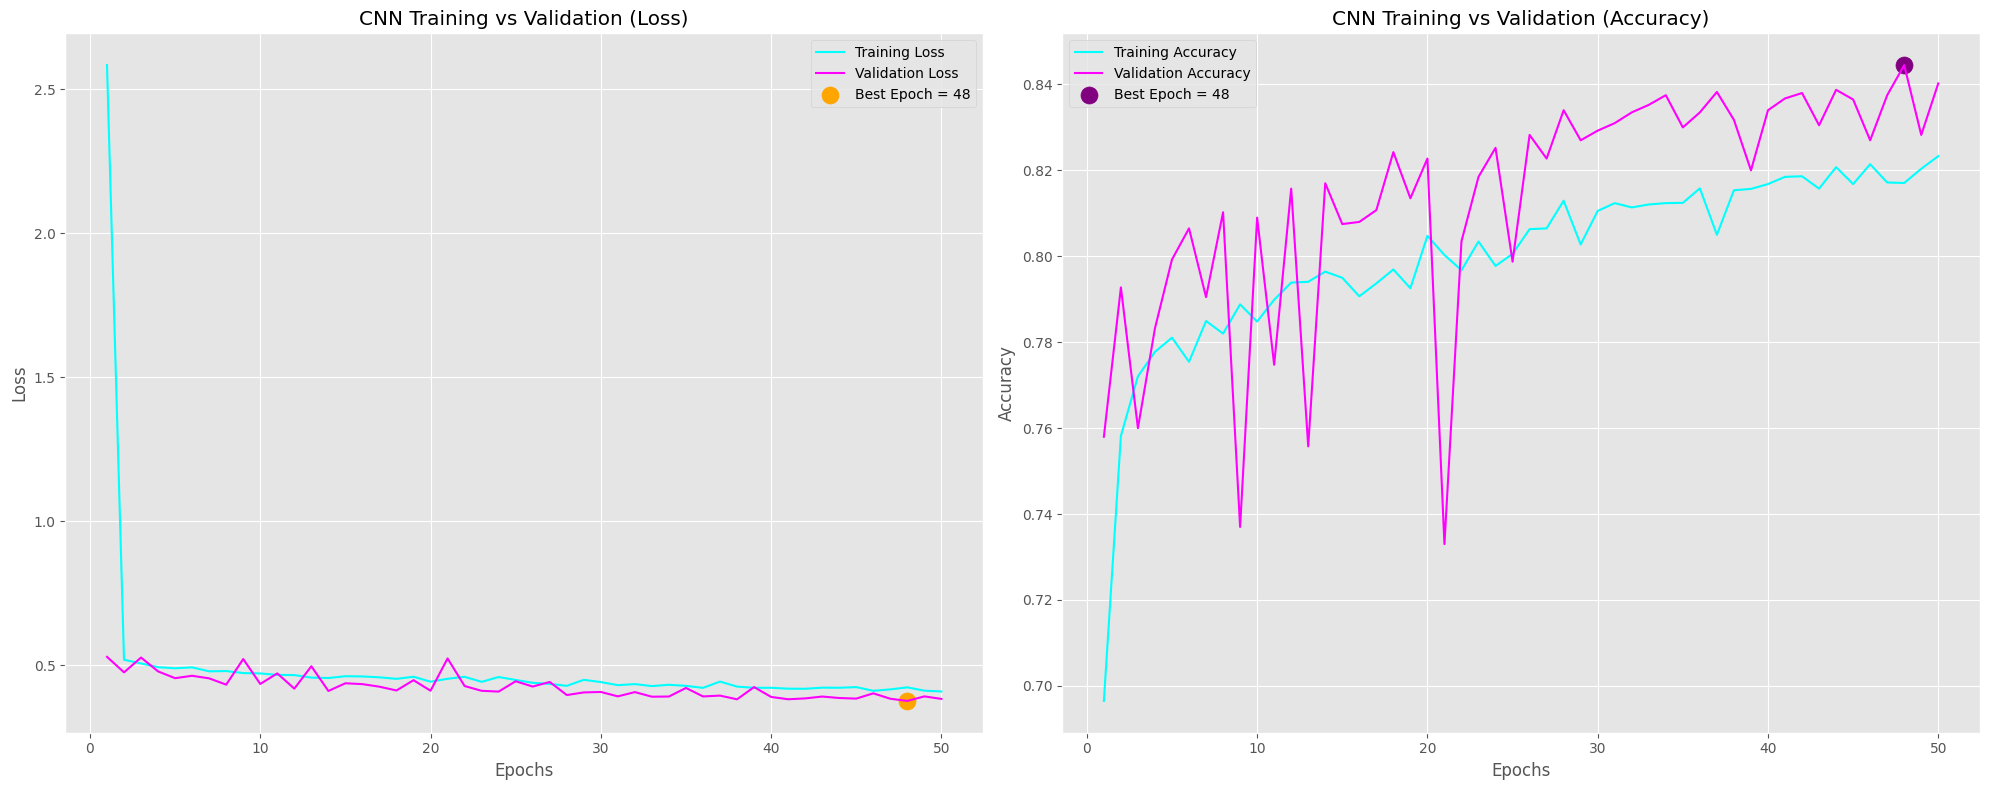

125/125 - 1s - loss: 0.3839 - accuracy: 0.8403 - 636ms/epoch - 5ms/step
CNN Test Loss: 0.38386911153793335
CNN Test Accuracy: 0.8402500152587891


In [21]:
# Extract training and validation metrics from the training history
training_accuracy = cnn_model_history.history['accuracy']
training_loss = cnn_model_history.history['loss']

validation_accuracy = cnn_model_history.history['val_accuracy']
validation_loss = cnn_model_history.history['val_loss']

# Identify the best epochs based on validation loss and accuracy
best_epoch_for_loss = np.argmin(validation_loss)
best_epoch_for_accuracy = np.argmax(validation_accuracy)
lowest_val_loss = validation_loss[best_epoch_for_loss]
highest_val_accuracy = validation_accuracy[best_epoch_for_accuracy]

# Generate a list of epoch numbers
epochs = range(1, len(training_accuracy) + 1)
label_for_loss = f'Best Epoch = {best_epoch_for_loss + 1}'
label_for_accuracy = f'Best Epoch = {best_epoch_for_accuracy + 1}'

# Plot Training vs Validation Loss
plt.figure(figsize=(20, 8))
plt.style.use('ggplot')

plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'cyan', label='Training Loss')
plt.plot(epochs, validation_loss, 'magenta', label='Validation Loss')
plt.scatter(best_epoch_for_loss + 1, lowest_val_loss, s=150, c='orange', label=label_for_loss)
plt.title('CNN Training vs Validation (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'cyan', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'magenta', label='Validation Accuracy')
plt.scatter(best_epoch_for_accuracy + 1, highest_val_accuracy, s=150, c='purple', label=label_for_accuracy)
plt.title('CNN Training vs Validation (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test dataset
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=2)
print(f'CNN Test Loss: {test_loss}')
print(f'CNN Test Accuracy: {test_accuracy}')

In [22]:
def evaluate_model_performance(model, X_data, y_data, dataset_name):
    """
    Evaluate the performance of a trained model on a given dataset and display various metrics.
    Additionally, plots a confusion matrix.

    Args:
        model (tf.keras.Model): The trained model to evaluate.
        X_data (np.ndarray): Input features for evaluation.
        y_data (np.ndarray): True labels corresponding to X_data.
        dataset_name (str): Name of the dataset (e.g., 'Train', 'Validation', 'Test').

    Returns:
        None
    """
    # Predict the labels for the dataset
    y_pred = model.predict(X_data)

    # Convert predicted probabilities to binary labels
    y_pred_binary = np.argmax(y_pred, axis=1)
    y_true_binary = np.argmax(y_data, axis=1)

    # Calculate performance metrics
    accuracy = accuracy_score(y_true_binary, y_pred_binary)
    recall = recall_score(y_true_binary, y_pred_binary)
    precision = precision_score(y_true_binary, y_pred_binary)
    f1 = f1_score(y_true_binary, y_pred_binary)
    confusion_mat = confusion_matrix(y_true_binary, y_pred_binary)

    # Print performance metrics
    print(f"{dataset_name} Dataset Performance:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"Confusion Matrix:\n{confusion_mat}\n")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["BENIGN", "MALIGNANT"], yticklabels=["BENIGN", "MALIGNANT"])
    plt.title(f"{dataset_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

500/500 [==============================] - 3s 7ms/step
Train Dataset Performance:
Accuracy: 0.830
Recall: 0.867
Precision: 0.807
F1 Score: 0.836
Confusion Matrix:
[[6376 1656]
 [1060 6908]]



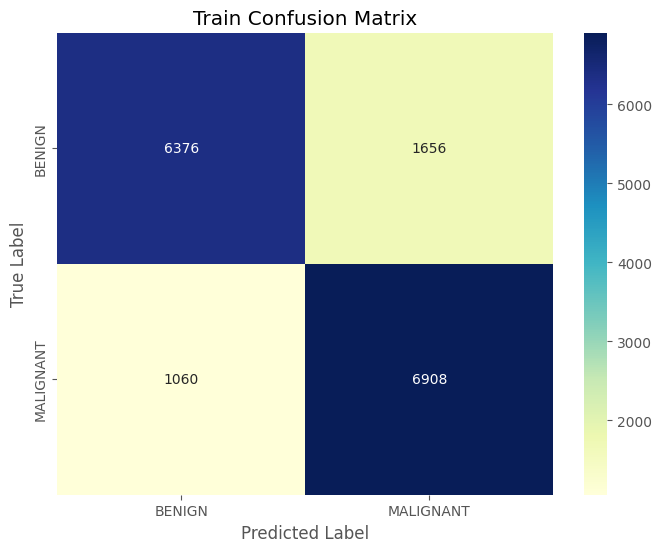

In [23]:
#Train data
evaluate_model_performance(cnn_model, X_train, y_train, "Train")

125/125 [==============================] - 1s 7ms/step
Test Dataset Performance:
Accuracy: 0.840
Recall: 0.871
Precision: 0.825
F1 Score: 0.847
Confusion Matrix:
[[1592  376]
 [ 263 1769]]



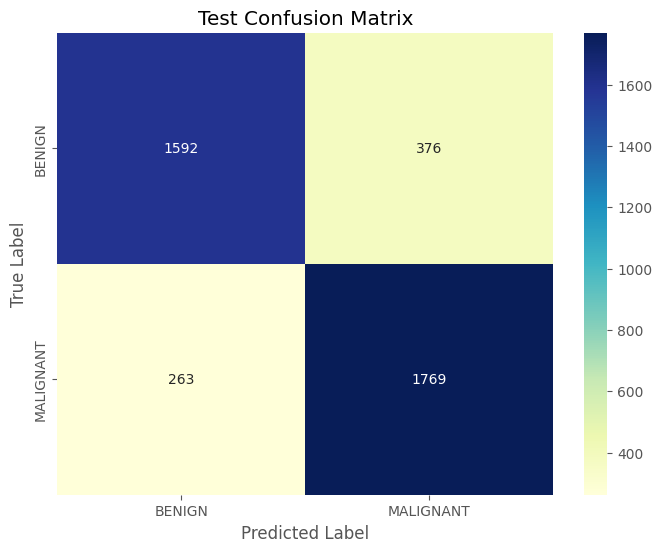

In [24]:
#test data
evaluate_model_performance(cnn_model, X_test, y_test, "Test")

125/125 [==============================] - 1s 7ms/step


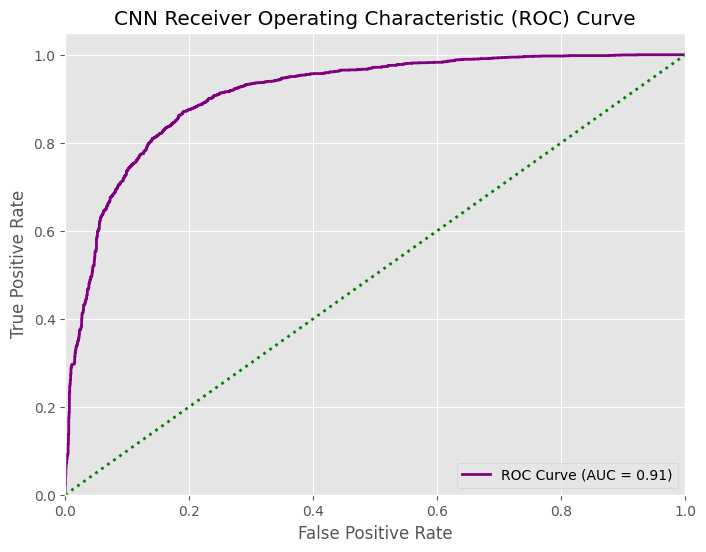

Area Under the Curve (AUC): 0.91


In [25]:
# Predict the probabilities for the test set using the trained model
y_pred_probability = cnn_model.predict(X_test)

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test[:, 1], y_pred_probability[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Output the AUC score
print(f'Area Under the Curve (AUC): {roc_auc:.2f}')

In [26]:
# Modified model with EfficientNetB0 base
def build_efficientnet_model(input_dimensions):
    """Build and compile a model using EfficientNetB0 as the base."""
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_dimensions)

    efficientnet_model = Sequential()
    efficientnet_model.add(base_model)

    efficientnet_model.add(GlobalAveragePooling2D())
    efficientnet_model.add(Dense(256, activation='relu'))
    efficientnet_model.add(Dropout(0.2))
    efficientnet_model.add(Dense(128, activation='relu'))
    efficientnet_model.add(Dropout(0.2))
    efficientnet_model.add(Dense(2, activation='softmax'))

    # Compile the model
    efficientnet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    return efficientnet_model, early_stop

# Define the input shape
input_shape_model = (50, 50, 3)

# Create and compile the EfficientNetB0 model
model_efficientnet, early_stop_efficientnet = build_efficientnet_model(input_shape_model)

# Train the EfficientNet model
efficientnet_history = model_efficientnet.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=50, validation_data=(X_test, y_test), callbacks=[early_stop_efficientnet])

# Evaluate the model on the test set
test_loss_efficientnet, test_accuracy_efficientnet = model_efficientnet.evaluate(X_test, y_test)
print(f'Final Validation Loss (EfficientNetB0): {test_loss_efficientnet:.4f}')
print(f'Final Validation Accuracy (EfficientNetB0): {test_accuracy_efficientnet:.4f}')
# Save the EfficientNetB0 model  file
model_efficientnet.save('efficientnetb0_model_cbis.h5')
print("Modified EfficientNetB0 Model saved to disk.")


16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/50
500/500 [==============================] - 128s 218ms/step - loss: 0.4540 - accuracy: 0.8019 - val_loss: 0.4326 - val_accuracy: 0.8232
Epoch 2/50
500/500 [==============================] - 107s 214ms/step - loss: 0.4027 - accuracy: 0.8294 - val_loss: 0.3278 - val_accuracy: 0.8618
Epoch 3/50
500/500 [==============================] - 106s 212ms/step - loss: 0.3801 - accuracy: 0.8393 - val_loss: 0.4205 - val_accuracy: 0.8317
Epoch 4/50
500/500 [==============================] - 106s 213ms/step - loss: 0.3674 - accuracy: 0.8461 - val_loss: 0.3656 - val_accuracy: 0.8550
Epoch 5/50
500/500 [==============================] - 107s 213ms/step - loss: 0.3602 - accuracy: 0.8484 - val_loss: 0.3446 - val_accuracy: 0.8575
Epoch 6/50
500/500 [==============================] - 107s 213ms/step - loss: 0.3506 - accuracy: 0.8541 - val_loss: 0.3548 - val_accuracy: 0.8633
Epoch 7/50
500/500 [==============================] - 106s 

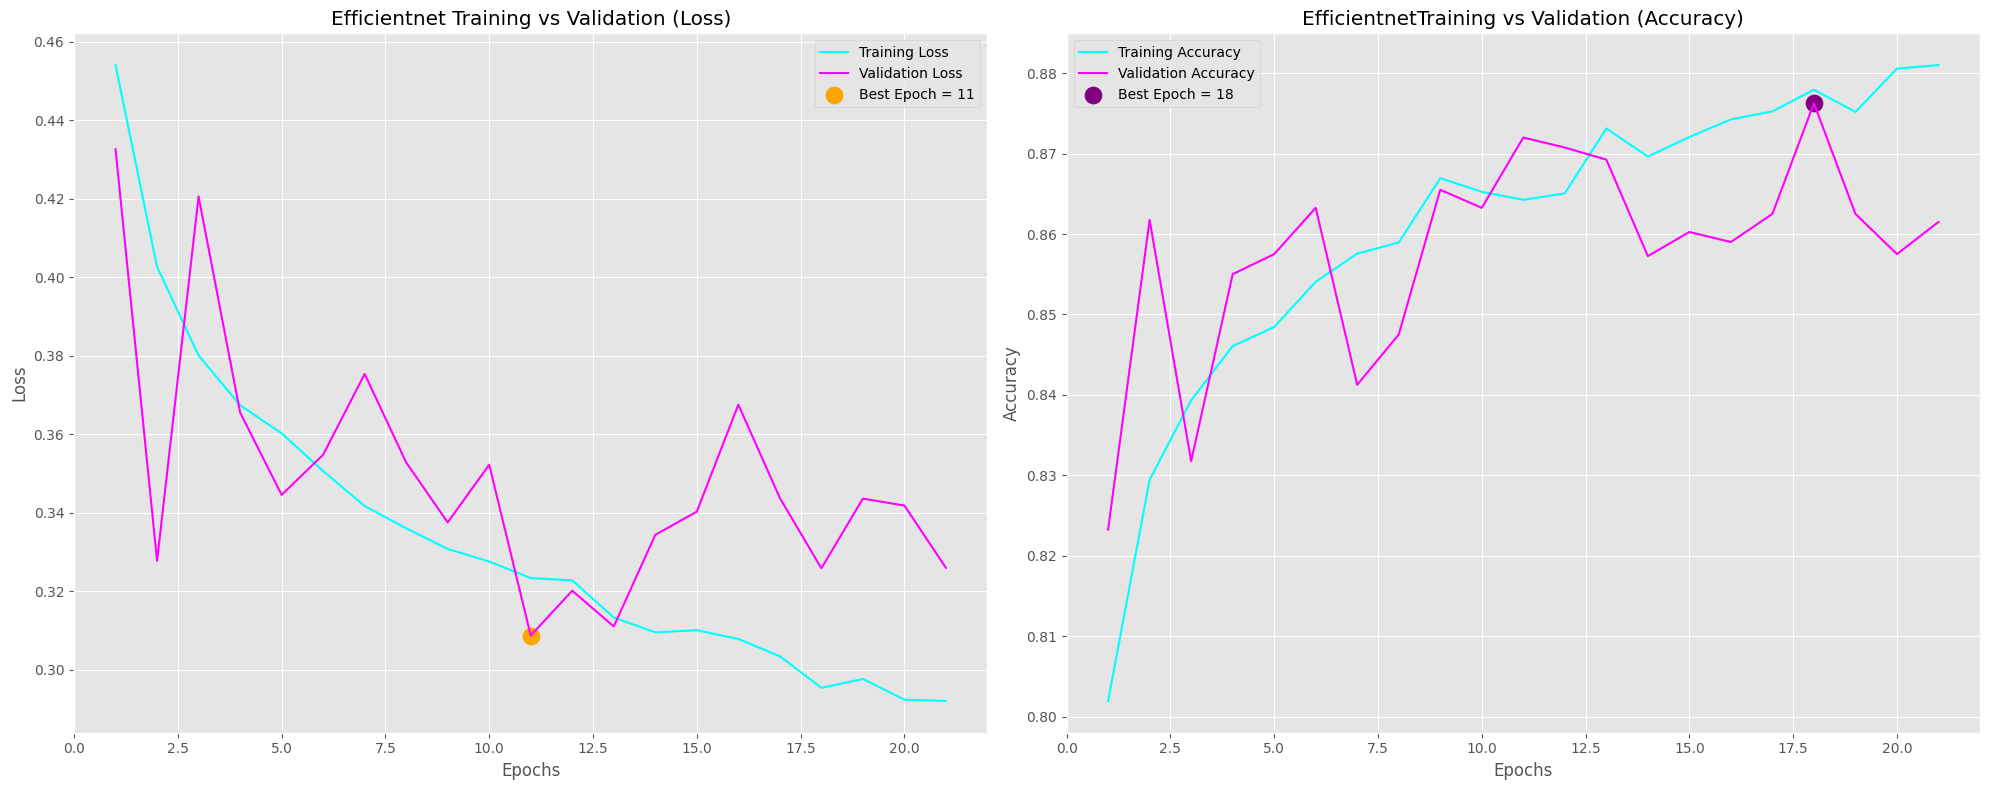

125/125 - 6s - loss: 0.3088 - accuracy: 0.8720 - 6s/epoch - 47ms/step
Efficientnet Test Loss: 0.308773010969162
Efficientnet Test Accuracy: 0.871999979019165


In [28]:
# Extract training and validation metrics from the training history
training_accuracy = efficientnet_history.history['accuracy']
training_loss = efficientnet_history.history['loss']

validation_accuracy = efficientnet_history.history['val_accuracy']
validation_loss = efficientnet_history.history['val_loss']

# Identify the best epochs based on validation loss and accuracy
best_epoch_for_loss = np.argmin(validation_loss)
best_epoch_for_accuracy = np.argmax(validation_accuracy)
lowest_val_loss = validation_loss[best_epoch_for_loss]
highest_val_accuracy = validation_accuracy[best_epoch_for_accuracy]

# Generate a list of epoch numbers
epochs = range(1, len(training_accuracy) + 1)
label_for_loss = f'Best Epoch = {best_epoch_for_loss + 1}'
label_for_accuracy = f'Best Epoch = {best_epoch_for_accuracy + 1}'

# Plot Training vs Validation Loss
plt.figure(figsize=(20, 8))
plt.style.use('ggplot')

plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'cyan', label='Training Loss')
plt.plot(epochs, validation_loss, 'magenta', label='Validation Loss')
plt.scatter(best_epoch_for_loss + 1, lowest_val_loss, s=150, c='orange', label=label_for_loss)
plt.title('Efficientnet Training vs Validation (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'cyan', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'magenta', label='Validation Accuracy')
plt.scatter(best_epoch_for_accuracy + 1, highest_val_accuracy, s=150, c='purple', label=label_for_accuracy)
plt.title('EfficientnetTraining vs Validation (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test dataset
test_loss, test_accuracy = model_efficientnet.evaluate(X_test, y_test, verbose=2)
print(f'Efficientnet Test Loss: {test_loss}')
print(f'Efficientnet Test Accuracy: {test_accuracy}')

500/500 [==============================] - 26s 50ms/step
Train Dataset Performance:
Accuracy: 0.878
Recall: 0.903
Precision: 0.858
F1 Score: 0.880
Confusion Matrix:
[[6842 1190]
 [ 769 7199]]



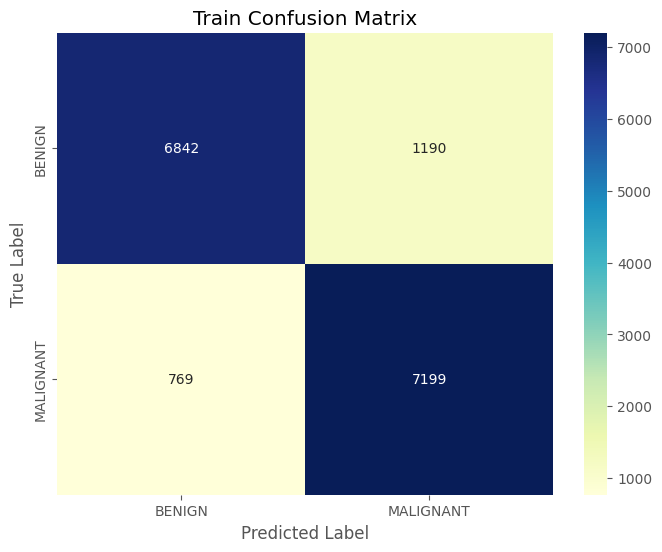

In [29]:
#Train data
evaluate_model_performance(model_efficientnet, X_train, y_train, "Train")

125/125 [==============================] - 6s 50ms/step
Test Dataset Performance:
Accuracy: 0.872
Recall: 0.897
Precision: 0.858
F1 Score: 0.877
Confusion Matrix:
[[1666  302]
 [ 210 1822]]



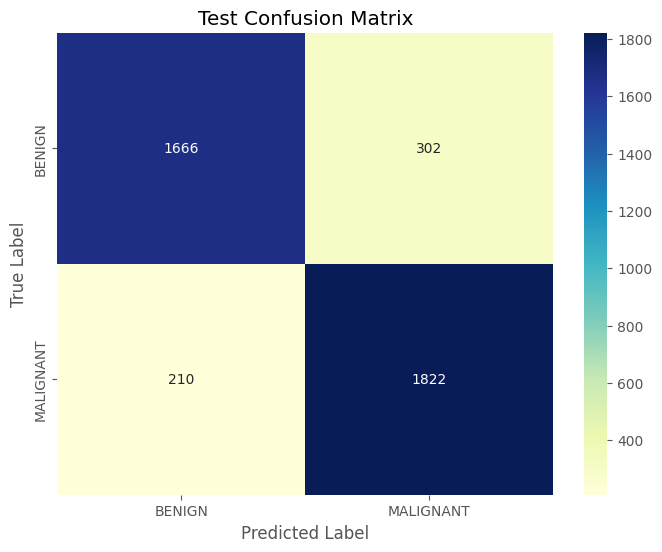

In [30]:
#test data
evaluate_model_performance(model_efficientnet, X_test, y_test, "Test")

125/125 [==============================] - 6s 50ms/step


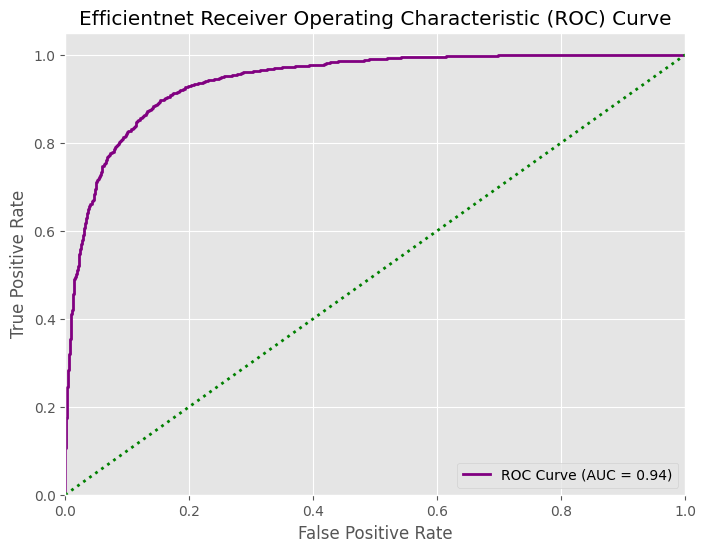

Area Under the Curve (AUC): 0.94


In [31]:
# Predict the probabilities for the test set using the trained model
y_pred_probability = model_efficientnet.predict(X_test)

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test[:, 1], y_pred_probability[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Efficientnet Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Output the AUC score
print(f'Area Under the Curve (AUC): {roc_auc:.2f}')
